In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df=pd.read_csv('food_orders_new_delhi.csv')

In [4]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [5]:
df.shape

(1000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [11]:
# Data Cleaning - converting date and time column to datetime
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [37]:
# Function to extract numeric discount amount
def extract_discount(value, order_value):
    if pd.isna(value) or value.lower() == "none":
        return 0
    elif '%' in value:
        match = re.search(r'(\d+)%', value)
        if match:
            percent = int(match.group(1))
            return round(order_value * percent / 100, 2)  # percentage discount
    elif 'off' in value.lower():
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))  # flat amount discount
    return 0

# Apply the function to calculate 'Discount Amount'
df['Discount Amount'] = df.apply(lambda row: extract_discount(row['Discounts and Offers'], row['Order Value']), axis=1)

# Ensure numeric format for calculations
monetary_columns = ['Order Value', 'Delivery Fee', 'Commission Fee',
                    'Payment Processing Fee', 'Refunds/Chargebacks', 'Discount Amount']
df[monetary_columns] = df[monetary_columns].astype(float)

# Calculate total cost and profit
df['Total Cost'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df['Profit'] = df['Commission Fee'] - df['Total Cost']

# Display sample output
df[['Order ID', 'Order Value', 'Discounts and Offers', 'Discount Amount', 'Total Cost', 'Profit']].head()


,Order ID,Order Value,Discounts and Offers,Discount Amount,Total Cost,Profit
0,1,1914.0,5% on App,95.70,142.70,7.30
1,2,986.0,10%,98.60,161.60,36.40
2,3,937.0,15% New User,140.55,215.55,-20.55
3,4,1463.0,NaN,0.00,77.00,69.00
4,5,1992.0,50 off Promo,50.00,130.00,0.00


In [38]:
# Function to extract percentage from discount text
def extract_discount_percentage(value):
    if pd.isna(value) or value.lower() == "none":
        return 0
    elif '%' in value:
        match = re.search(r'(\d+)%', value)
        return int(match.group(1)) if match else 0
    else:
        return 0

# Apply the function to create the new column
df['Discount Percentage'] = df['Discounts and Offers'].apply(extract_discount_percentage)


In [39]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount,Total Cost,Profit,Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914.0,0.0,Credit Card,5% on App,150.0,47.0,0.0,95.70,142.70,7.30,5
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986.0,40.0,Digital Wallet,10%,198.0,23.0,0.0,98.60,161.60,36.40,10
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937.0,30.0,Cash on Delivery,15% New User,195.0,45.0,0.0,140.55,215.55,-20.55,15
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463.0,50.0,Cash on Delivery,NaN,146.0,27.0,0.0,0.00,77.00,69.00,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992.0,30.0,Cash on Delivery,50 off Promo,130.0,50.0,0.0,50.00,130.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825.0,0.0,Digital Wallet,5% on App,165.0,47.0,50.0,41.25,88.25,76.75,5
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627.0,50.0,Cash on Delivery,NaN,110.0,42.0,0.0,0.00,92.00,18.00,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553.0,20.0,Cash on Delivery,NaN,64.0,31.0,0.0,0.00,51.00,13.00,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414.0,0.0,Cash on Delivery,15% New User,199.0,34.0,0.0,212.10,246.10,-47.10,15


In [40]:
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']

In [41]:
total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

In [43]:
Complete_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit}

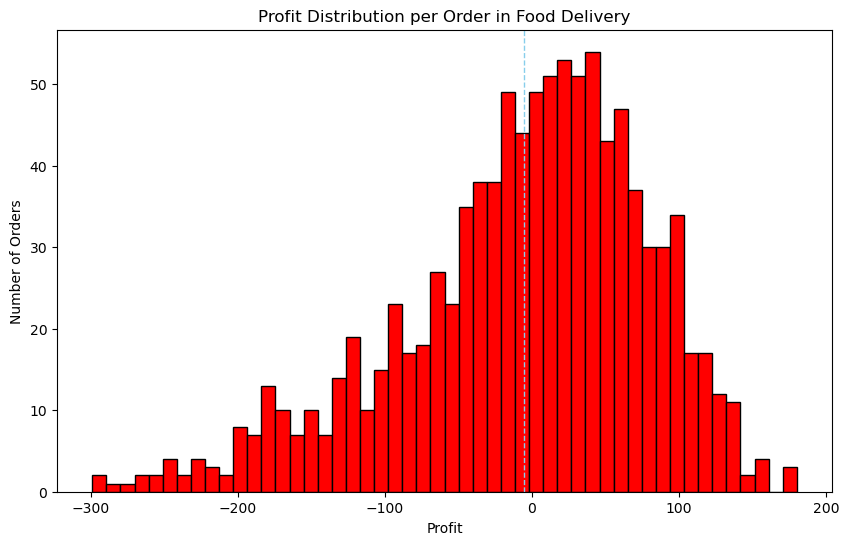

In [49]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, color='red', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Profit'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.show()

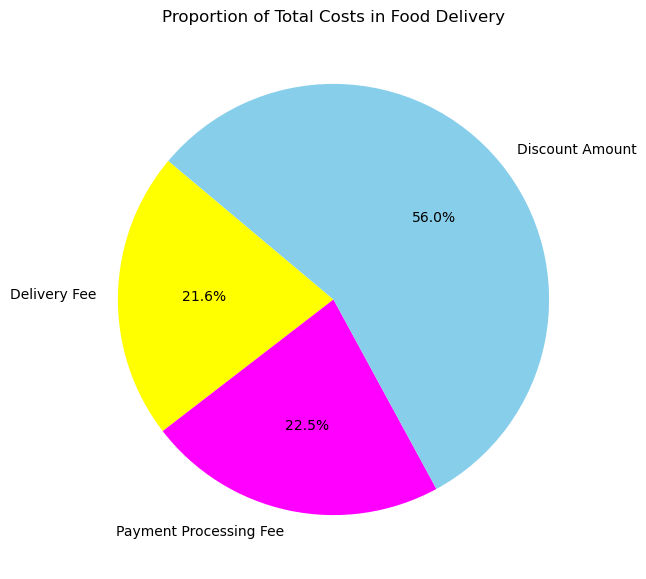

In [50]:
# pie chart for the proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['yellow', 'magenta', 'skyblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

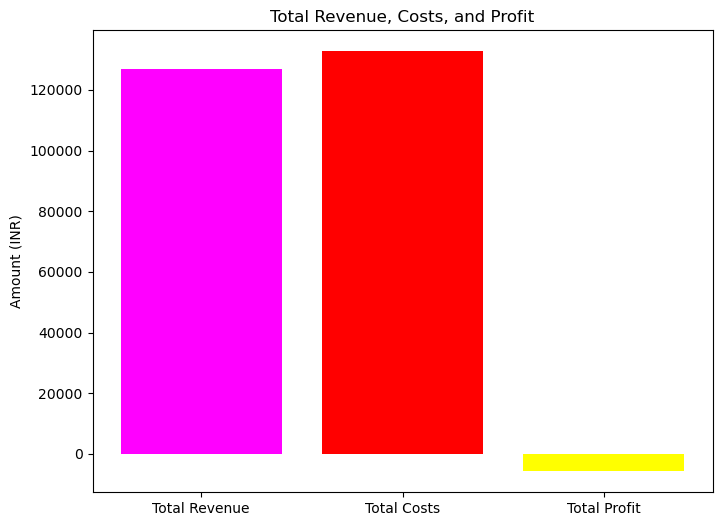

In [51]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['magenta', 'red', 'yellow'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [52]:
# filter the dataset for profitable orders
profitable_orders = df[df['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

27.706528082159736 5.623712042253798


C:\Users\Joseph\AppData\Local\Temp\ipykernel_3984\1524930468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
C:\Users\Joseph\AppData\Local\Temp\ipykernel_3984\1524930468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


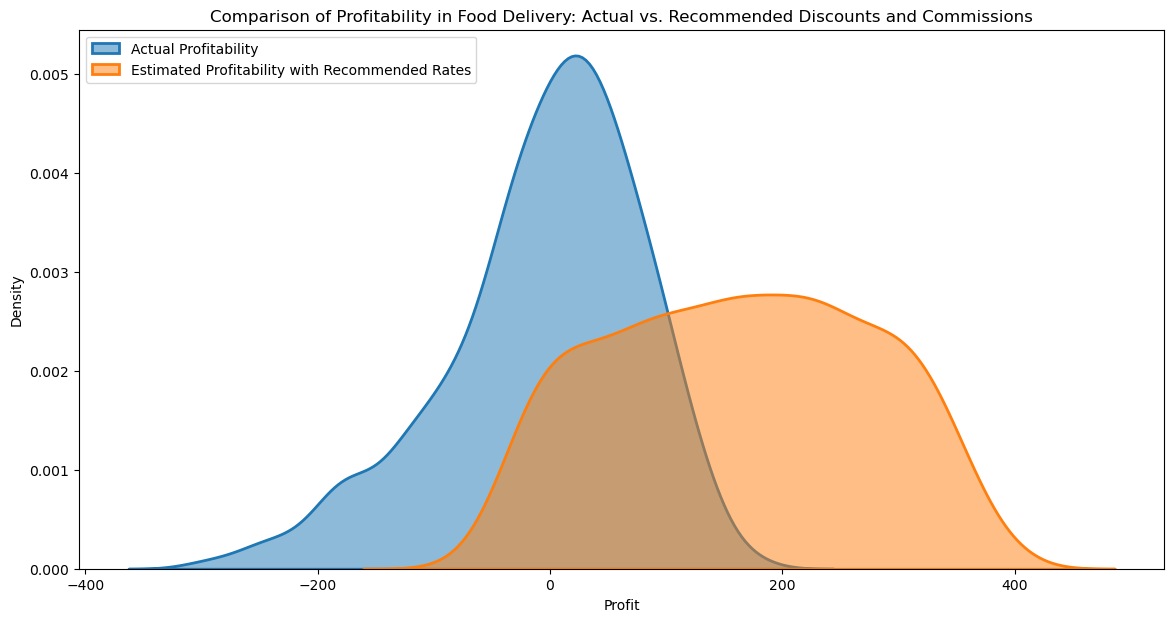

In [54]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 27.0  # 27%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()